In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

dataset = pd.read_csv('...\\User_Data.csv')

# input
x = dataset.iloc[:, [2, 3]].values
 
# output
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(
        x, y, test_size = 0.25, random_state = 0)

In [6]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain)
xtest = sc_x.transform(xtest)

print (xtrain[0:10, :])

[[ 0.58164944 -0.88670699]
 [-0.60673761  1.46173768]
 [-0.01254409 -0.5677824 ]
 [-0.60673761  1.89663484]
 [ 1.37390747 -1.40858358]
 [ 1.47293972  0.99784738]
 [ 0.08648817 -0.79972756]
 [-0.01254409 -0.24885782]
 [-0.21060859 -0.5677824 ]
 [-0.21060859 -0.19087153]]


In [7]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
 
print ("Confusion Matrix : \n", cm)


Confusion Matrix : 
 [[65  3]
 [ 8 24]]


In [8]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.89


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


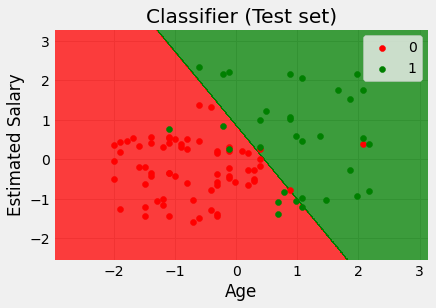

In [9]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1,
							stop = X_set[:, 0].max() + 1, step = 0.01),
					np.arange(start = X_set[:, 1].min() - 1,
							stop = X_set[:, 1].max() + 1, step = 0.01))

plt.contourf(X1, X2, classifier.predict(
			np.array([X1.ravel(), X2.ravel()]).T).reshape(
			X1.shape), alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
	plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
				c = ListedColormap(('red', 'green'))(i), label = j)
	
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
